## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Tue Apr  2 11:58:33 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8              13W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.23M/6.23M [00:00<00:00, 269MB/s]
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 92.1MB/s]
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 100.8ms
Speed: 12.7ms preprocess, 100.8ms inference, 844.8ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


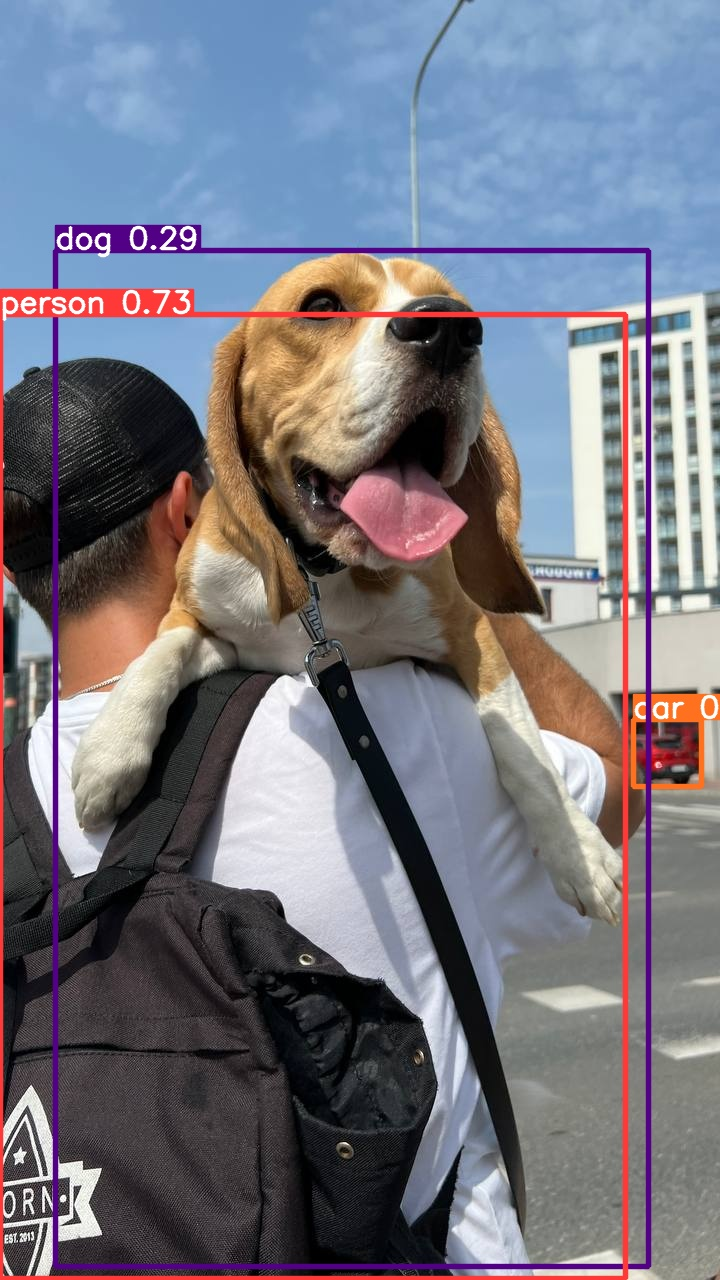

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 302.6ms
Speed: 3.3ms preprocess, 302.6ms inference, 1143.0ms postprocess per image at shape (1, 3, 640, 384)


In [ ]:
results[0].boxes.xyxy

tensor([[   0.0000,  314.4717,  625.0754, 1278.1946],
        [  55.1731,  250.0220,  648.1080, 1266.2720],
        [ 633.2291,  719.5391,  701.0538,  786.0336]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.7271, 0.2907, 0.2846], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

## Roboflow Universe

Need data for your project? Before spending time on annotating, check out Roboflow Universe, a repository of more than 110,000 open-source datasets that you can use in your projects. You'll find datasets containing everything from annotated cracks in concrete to plant images with disease annotations.


[![Roboflow Universe](https://media.roboflow.com/notebooks/template/uni-banner-frame.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672878480290)](https://universe.roboflow.com/)



## Preparing a custom dataset

Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process as straightforward and fast as possible. Let me show you how!

### Step 1: Creating project

Before you start, you need to create a Roboflow [account](https://app.roboflow.com/login). Once you do that, you can create a new project in the Roboflow [dashboard](https://app.roboflow.com/). Keep in mind to choose the right project type. In our case, Object Detection.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/creating-project.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929799852"
  >
</div>

### Step 2: Uploading images

Next, add the data to your newly created project. You can do it via API or through our [web interface](https://docs.roboflow.com/adding-data/object-detection).

If you drag and drop a directory with a dataset in a supported format, the Roboflow dashboard will automatically read the images and annotations together.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/uploading-images.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929808290"
  >
</div>

### Step 3: Labeling

If you only have images, you can label them in [Roboflow Annotate](https://docs.roboflow.com/annotate).

<div align="center">
  <img
    width="640"
    src="https://user-images.githubusercontent.com/26109316/210901980-04861efd-dfc0-4a01-9373-13a36b5e1df4.gif"
  >
</div>

### Step 4: Generate new dataset version

Now that we have our images and annotations added, we can Generate a Dataset Version. When Generating a Version, you may elect to add preprocessing and augmentations. This step is completely optional, however, it can allow you to significantly improve the robustness of your model.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/generate-new-version.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1673003597834"
  >
</div>

### Step 5: Exporting dataset

Once the dataset version is generated, we have a hosted dataset we can load directly into our notebook for easy training. Click `Export` and select the `YOLO v5 PyTorch` dataset format.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/export.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672943313709"
  >
</div>




In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="KCTLCouvartskFTBdvnj")
project = rf.workspace("object-detection-of-college").project("outdoor-navigation")
dataset = project.version(1).download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.8 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Outdoor-Navigation-1 in yolov8:: 100%|██████████| 1068/1068 [00:00<00:00, 9319.05it/s]


## Custom Training

In [ ]:
!yolo task=detect mode=predict model=yolov8s.pt conf=0.5 source=/content/test1.jpg save=True

100% 21.5M/21.5M [00:00<00:00, 348MB/s]
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 445, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 242, in predict
    return self.predictor.predict_cli(source=source) if is_cli else self.predictor(source=source, stream=stream)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/predictor.py", line 205, in predict_cli
    for _ in gen:  # running CLI inference without accumulating any outputs (do not modify)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 35, in generator

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 265MB/s]
New https://pypi.org/project/ultralytics/8.1.42 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Outdoor-Navigation-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, st

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    P_curve.png       train_batch2.jpg
confusion_matrix_normalized.png			    PR_curve.png      train_batch435.jpg
confusion_matrix.png				    R_curve.png       train_batch436.jpg
events.out.tfevents.1712059267.a42793512908.1207.0  results.csv       train_batch437.jpg
F1_curve.png					    results.png       val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg  val_batch0_pred.jpg
labels.jpg					    train_batch1.jpg  weights


/content


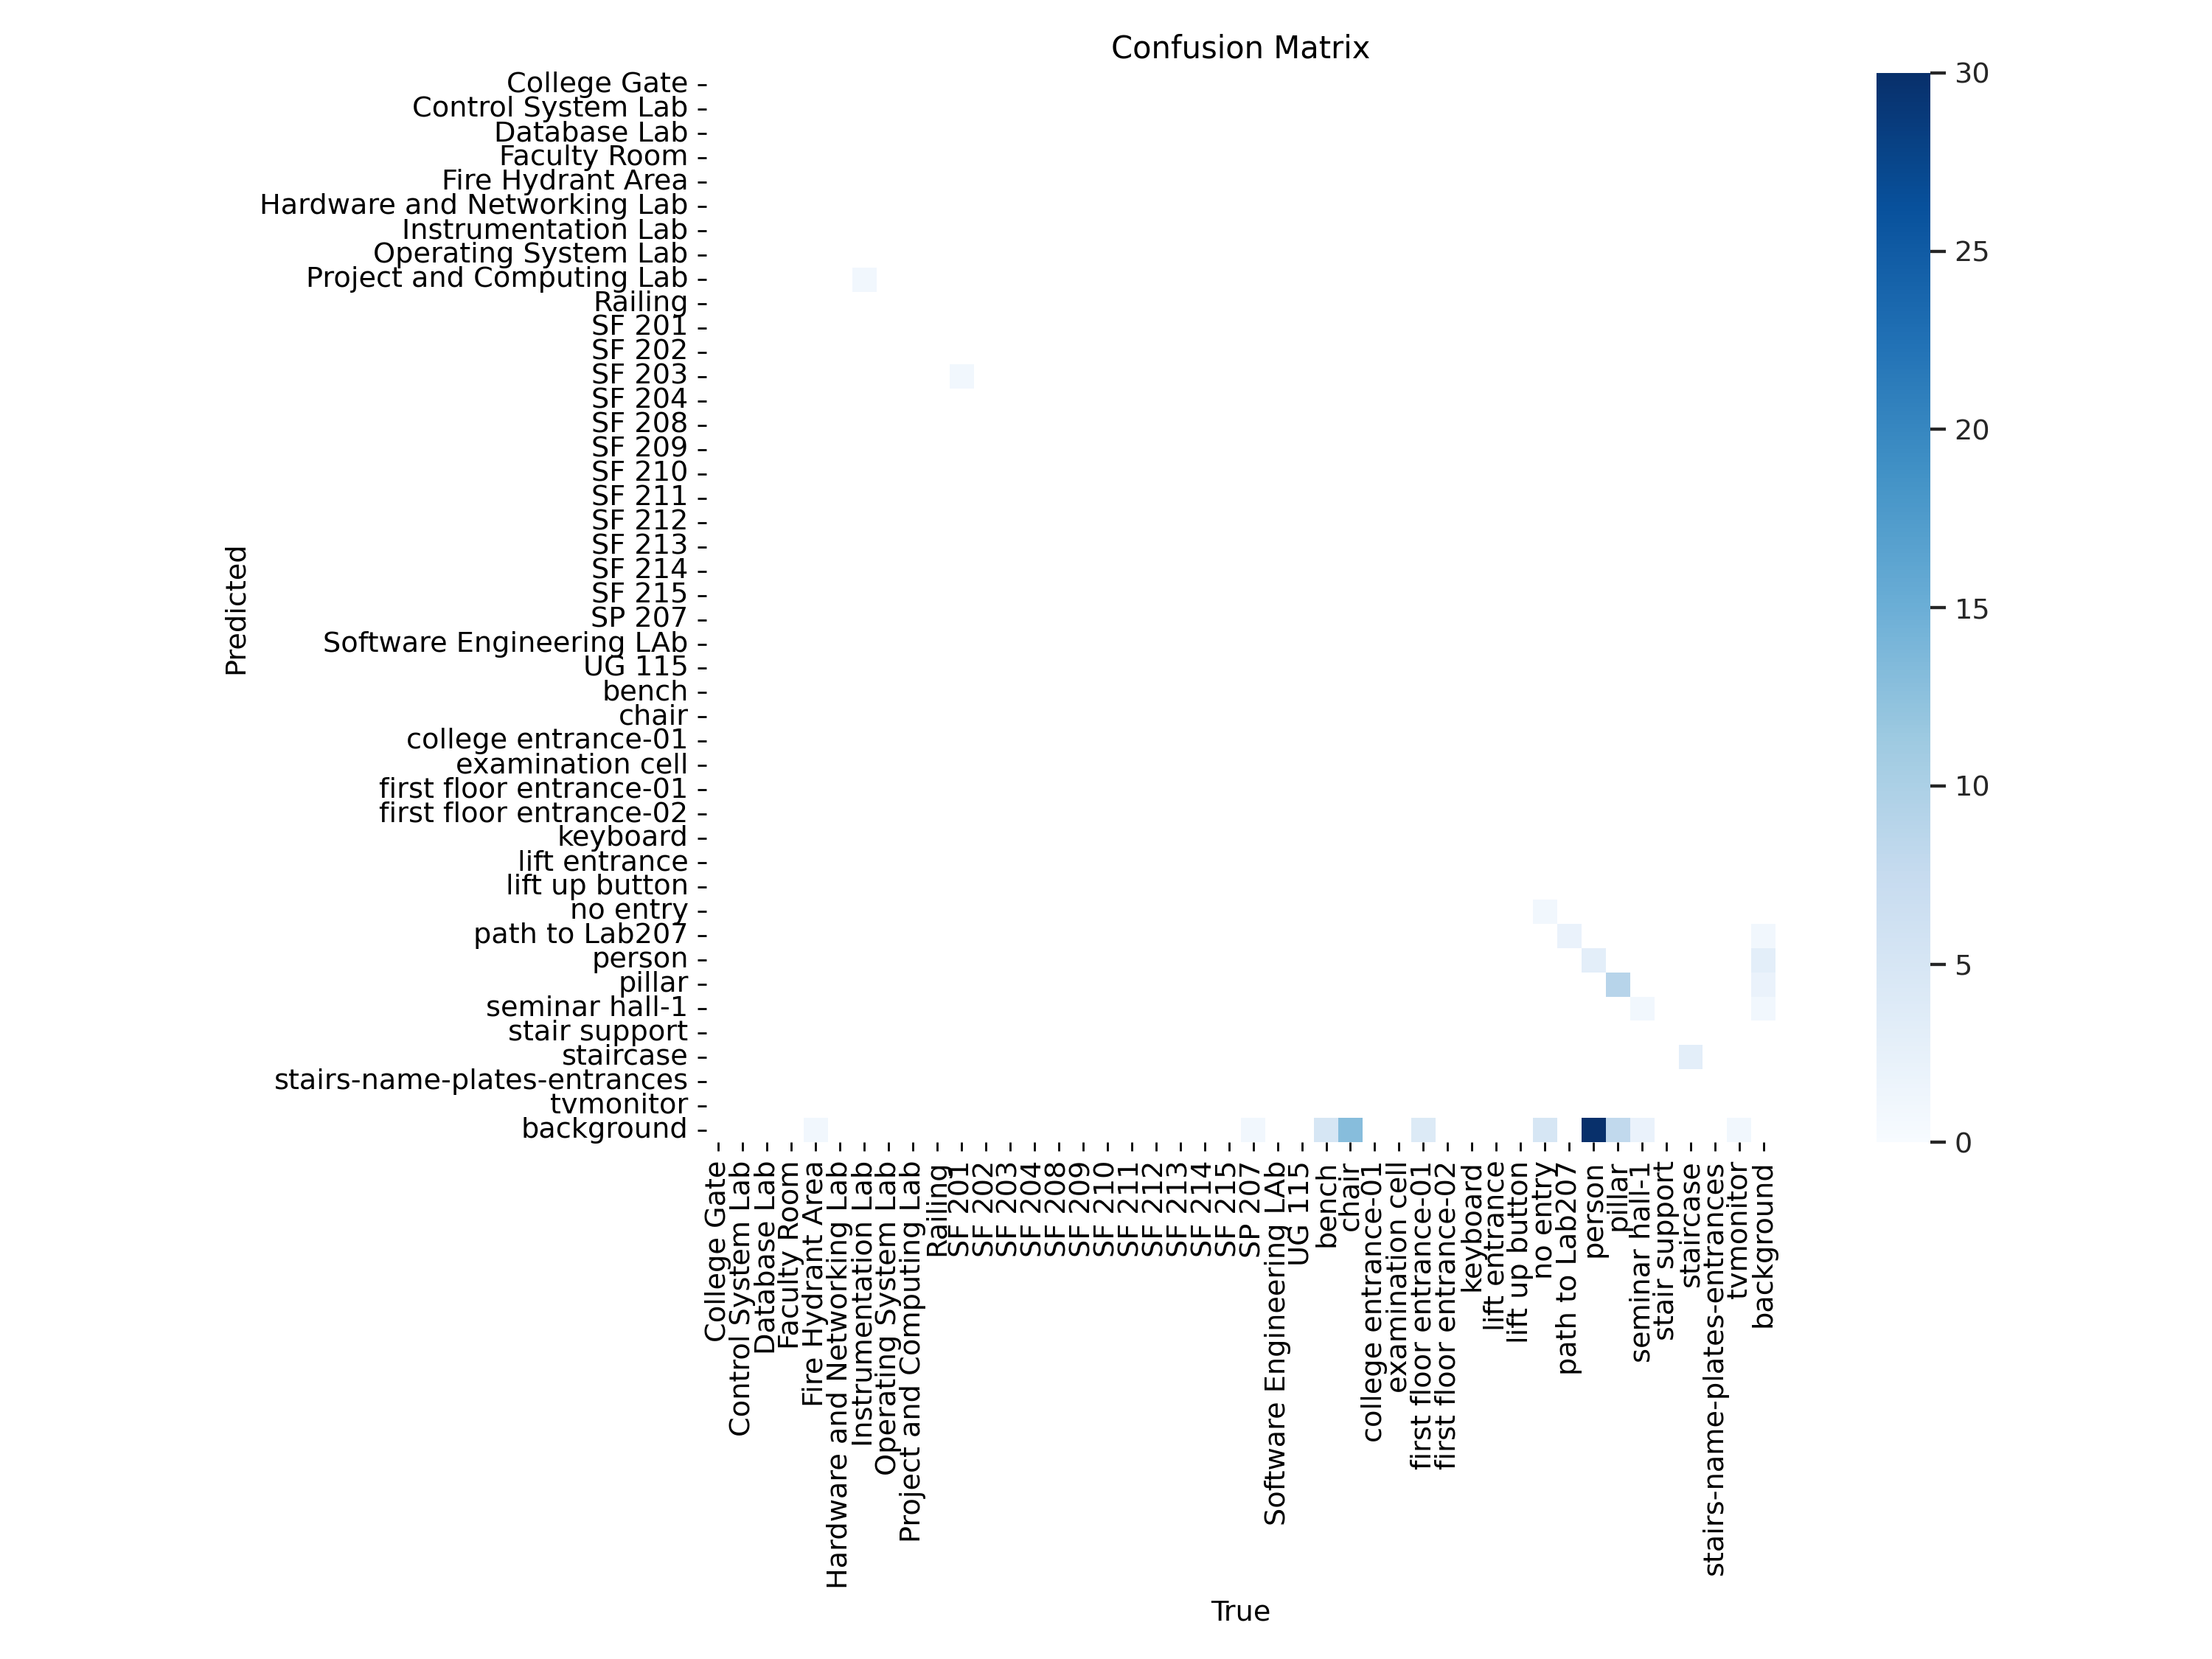

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


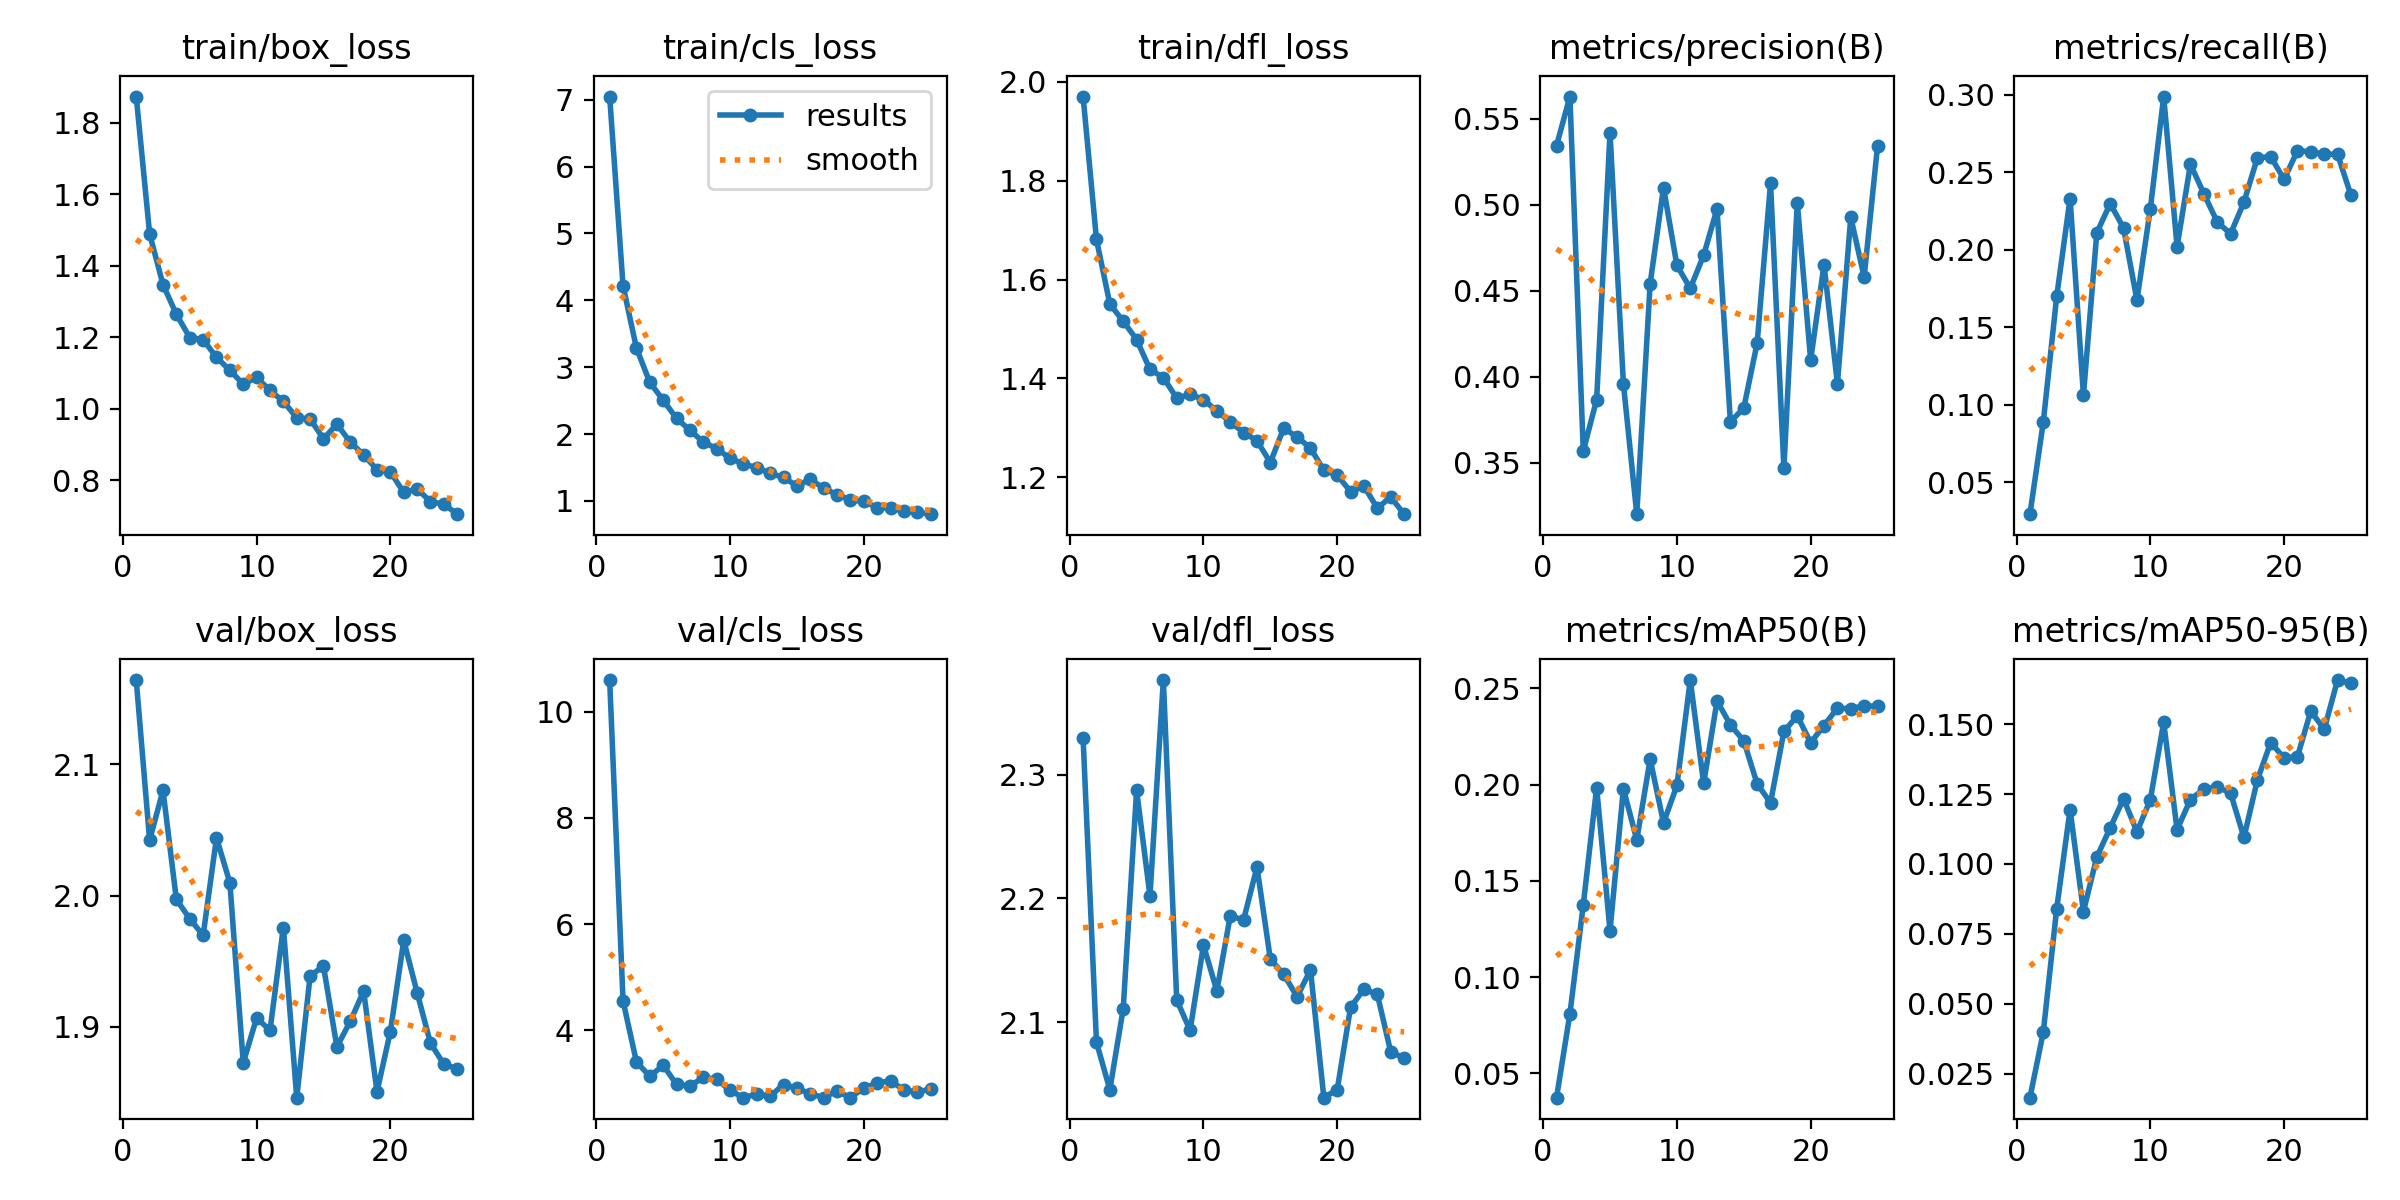

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


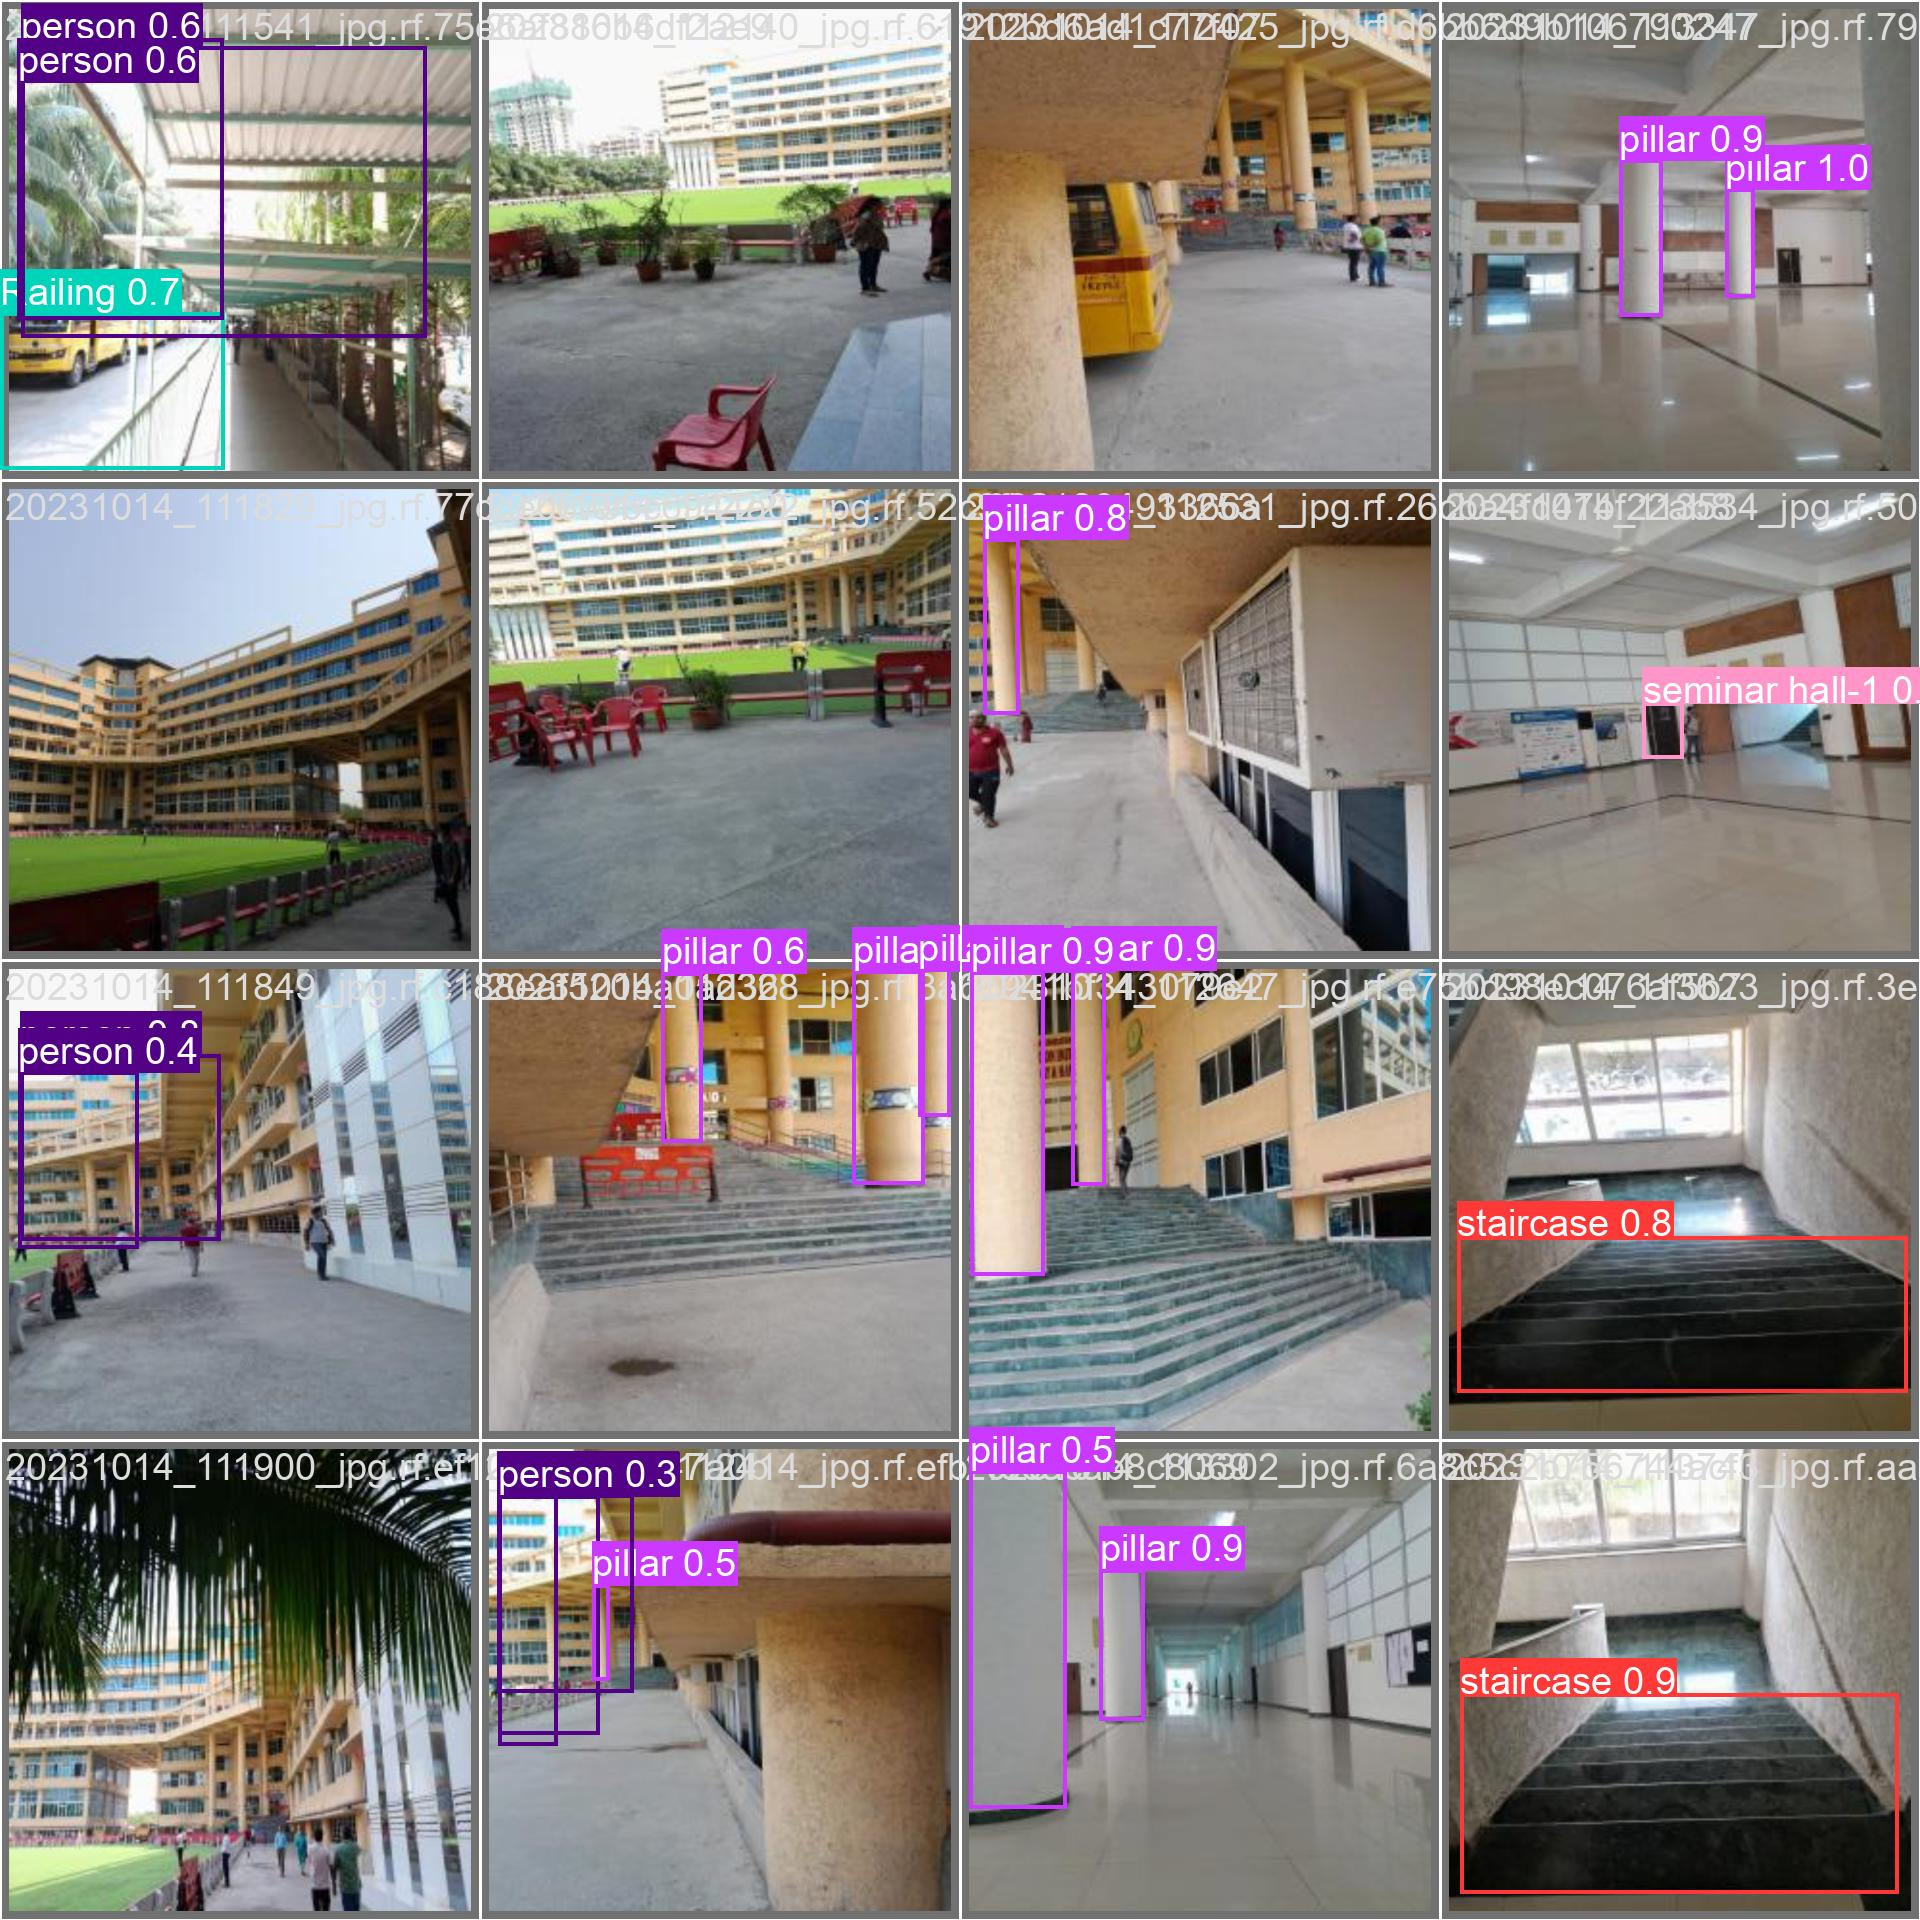

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11142225 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/Outdoor-Navigation-1/valid/labels.cache... 29 images, 0 backgrounds, 0 corrupt: 100% 29/29 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 81, len(boxes) = 91. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.34s/it]
                   all         29         91      0.425      0.256      0.237      0.166
     Fire Hydrant Area         29          1          0          0          0          0
   Instrumentation Lab         29          1          0          0          0          0
                SF 20

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.9 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11142225 parameters, 0 gradients, 28.5 GFLOPs

image 1/37 /content/datasets/Outdoor-Navigation-1/test/images/20231014_111123_jpg.rf.291b10741b94ebed4b3368426f57ad96.jpg: 800x800 (no detections), 22.7ms
image 2/37 /content/datasets/Outdoor-Navigation-1/test/images/20231014_111129_jpg.rf.820e5b0f2d233a5e00ffe9823e884e8f.jpg: 800x800 (no detections), 22.8ms
image 3/37 /content/datasets/Outdoor-Navigation-1/test/images/20231014_111155_jpg.rf.9b697f6d83cbe0b1872c18024e3e5de6.jpg: 800x800 (no detections), 22.8ms
image 4/37 /content/datasets/Outdoor-Navigation-1/test/images/20231014_112313_jpg.rf.29d9bdd01c58a411b392038c62328cd1.jpg: 800x800 (no detections), 22.7ms
image 5/37 /content/datasets/Outdoor-Navigation-1/test/images/20231014_112524_jpg.rf.56c029352adee7f327696513a734d223.jpg: 800x800 (no detections), 22.7ms
WARNING ⚠️ NMS time limit 0.550s exceeded
imag

**NOTE:** Let's take a look at few results.

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict4/*.jpg'):
      display(Image(filename=image_path, width=400))
      print("")


## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


In [ ]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on 20231014_115452_jpg.rf.32bc9e1697e31d5cc203a4e3914d0aa2.jpg


{'predictions': [{'x': 30.5,
   'y': 111.0,
   'width': 41.0,
   'height': 220.0,
   'confidence': 0.7693607807159424,
   'class': 'pillar',
   'class_id': 37,
   'detection_id': '063b3e73-11fb-4be2-bae0-7e88f656e81e',
   'image_path': '/content/datasets/Outdoor-Navigation-1/test/images/20231014_115452_jpg.rf.32bc9e1697e31d5cc203a4e3914d0aa2.jpg',
   'prediction_type': 'ObjectDetectionModel'}],
 'image': {'width': '240', 'height': '240'}}

# Deploy Your Model to the Edge

In addition to using the Roboflow hosted API for deployment, you can use [Roboflow Inference](https://inference.roboflow.com), an open source inference solution that has powered millions of API calls in production environments. Inference works with CPU and GPU, giving you immediate access to a range of devices, from the NVIDIA Jetson to TRT-compatible devices to ARM CPU devices.

With Roboflow Inference, you can self-host and deploy your model on-device. You can deploy applications using the [Inference Docker containers](https://inference.roboflow.com/quickstart/docker/) or the pip package.

For example, to install Inference on a device with an NVIDIA GPU, we can use:

```
docker pull roboflow/roboflow-inference-server-gpu
```

Then we can run inference via HTTP:

```python
import requests

workspace_id = ""
model_id = ""
image_url = ""
confidence = 0.75
api_key = ""

infer_payload = {
    "image": {
        "type": "url",
        "value": image_url,
    },
    "confidence": confidence,
    "iou_threshold": iou_thresh,
    "api_key": api_key,
}
res = requests.post(
    f"http://localhost:9001/{workspace_id}/{model_id}",
    json=infer_object_detection_payload,
)

predictions = res.json()
```

Above, set your Roboflow workspace ID, model ID, and API key.

- [Find your workspace and model ID](https://docs.roboflow.com/api-reference/workspace-and-project-ids?ref=blog.roboflow.com)
- [Find your API key](https://docs.roboflow.com/api-reference/authentication?ref=blog.roboflow.com#retrieve-an-api-key)

Also, set the URL of an image on which you want to run inference. This can be a local file.

_To use your YOLOv5 model commercially with Inference, you will need a Roboflow Enterprise license, through which you gain a pass-through license for using YOLOv5. An enterprise license also grants you access to features like advanced device management, multi-model containers, auto-batch inference, and more._

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.

In [ ]:
#!sudo apt-get install tesseract-ocr
#!pip install pytesseract

In [ ]:
#import os
#print(os.path.exists('/content/download.jpg'))

In [ ]:
#import pytesseract
#from PIL import Image
#import os
#
## Path to your Tesseract executable (change as per your installation)
#pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'  # Modify this path as needed
#
#def extract_text_from_image(image_path):
#    try:
#        # Open the image file using PIL
#        img = Image.open(image_path)
#
#        # Use pytesseract to do OCR on the image
#        extracted_text = pytesseract.image_to_string(img)
#
#        return extracted_text
#    except Exception as e:
#        print(f"Error processing image {image_path}: {e}")
#        return None
#
## Path to the image file
#image_path = '/content/20231014_1157481.jpg'
#
## Check if the file exists
#if os.path.exists(image_path):
#    # Extract text from the specified image
#    text_extracted = extract_text_from_image(image_path)
#
#    if text_extracted:
#        print(f"Text extracted from {image_path}:")
#        print(text_extracted)
#    else:
#        print(f"No text extracted from {image_path}")
#else:
#    print(f"File {image_path} not found.")


In [ ]:
import torch
from torchvision.transforms import ToTensor
from PIL import Image

# Define the path to the saved model
model_path = '/content/runs/detect/train/weights/best.pt'

# Load the saved model
loaded_model = torch.load(model_path, map_location=torch.device('cpu'))['model']

# Set the model to evaluation mode
loaded_model.eval()

# Define the input image path
image_path = '/content/datasets/Outdoor-Navigation-1/test/images/20231014_113139_jpg.rf.c2687934a4ea23ccea91c737f48a1304.jpg'

# Load and preprocess the input image
input_image = Image.open(image_path)
transform = ToTensor()
input_tensor = transform(input_image).unsqueeze(0)  # Add batch dimension

# Perform inference using the loaded model
with torch.no_grad():
    output = loaded_model(input_tensor)

# Process the output predictions as needed
# For example, print the output tensor shape
print("Output shape:", output.shape)


KeyError: 'model'

In [ ]:
import torch

# Define the path to the saved model
model_path = '/content/runs/detect/train/weights/best.pt'

# Load the saved model state dictionary
state_dict = torch.load(model_path, map_location=torch.device('cpu'))

# Print the keys in the state dictionary
print("Keys in the state dictionary:", state_dict.keys())

Keys in the state dictionary: odict_keys(['model.0.conv.weight', 'model.0.bn.weight', 'model.0.bn.bias', 'model.0.bn.running_mean', 'model.0.bn.running_var', 'model.0.bn.num_batches_tracked', 'model.1.conv.weight', 'model.1.bn.weight', 'model.1.bn.bias', 'model.1.bn.running_mean', 'model.1.bn.running_var', 'model.1.bn.num_batches_tracked', 'model.2.cv1.conv.weight', 'model.2.cv1.bn.weight', 'model.2.cv1.bn.bias', 'model.2.cv1.bn.running_mean', 'model.2.cv1.bn.running_var', 'model.2.cv1.bn.num_batches_tracked', 'model.2.cv2.conv.weight', 'model.2.cv2.bn.weight', 'model.2.cv2.bn.bias', 'model.2.cv2.bn.running_mean', 'model.2.cv2.bn.running_var', 'model.2.cv2.bn.num_batches_tracked', 'model.2.m.0.cv1.conv.weight', 'model.2.m.0.cv1.bn.weight', 'model.2.m.0.cv1.bn.bias', 'model.2.m.0.cv1.bn.running_mean', 'model.2.m.0.cv1.bn.running_var', 'model.2.m.0.cv1.bn.num_batches_tracked', 'model.2.m.0.cv2.conv.weight', 'model.2.m.0.cv2.bn.weight', 'model.2.m.0.cv2.bn.bias', 'model.2.m.0.cv2.bn.runni

In [ ]:
from PIL import Image
from ultralytics import YOLO

# Load your Ultralytics YOLO model
model = YOLO('yolov8s')

# Define the image path
image_path = '/content/datasets/Outdoor-Navigation-1/test/images/20231014_113139_jpg.rf.c2687934a4ea23ccea91c737f48a1304.jpg'

# Load the image for inference
image = Image.open(image_path)

# Perform object detection on the image
results = model(image)

# Check if any detections are available
if results.pred is not None:
    # Process and print the predictions
    for pred in results.pred[0]:
        label = model.names[pred[-1].int()]  # Get the class label from the model's class names
        confidence = pred[4]  # Confidence score
        bbox = pred[:4].tolist()  # Bounding box coordinates
        print(f"Label: {label}, Confidence: {confidence}, BBox: {bbox}")

    # Visualize the detection results
    results.show()
else:
    print("No detections found.")



0: 640x640 (no detections), 16.5ms
Speed: 3.1ms preprocess, 16.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


AttributeError: 'list' object has no attribute 'pred'

In [ ]:
import pickle

# Assuming you have the model path stored in a variable
model_path = '/content/runs/detect/train/weights/best.pt'

# Save the model path using pickle
with open('model_path.pkl', 'wb') as f:
    pickle.dump(model_path, f)


MODEL SAVE USING PICKLE

In [ ]:
import pickle

# Load the model path using pickle
with open('model_path.pkl', 'rb') as f:
    loaded_model_path = pickle.load(f)

# Now you have the loaded model path
print(loaded_model_path)  # This should print '{HOME}/runs/detect/train/weights/best.pt'


/content/runs/detect/train/weights/best.pt


In [ ]:
import torch

# Define the path to your model file
model_path = "/content/runs/detect/train/weights/best.pt"

# Load the state dictionary of the model
state_dict = torch.load(model_path, map_location=torch.device('cpu'))

# Print the data type of weights for each parameter in the state dictionary
for name, param in state_dict.items():
    if isinstance(param, torch.Tensor):
        print(f"Parameter name: {name}, Data type: {param.dtype}")
    else:
        print(f"Parameter name: {name}, Data type: {type(param)}")


Parameter name: model.0.conv.weight, Data type: torch.float32
Parameter name: model.0.bn.weight, Data type: torch.float32
Parameter name: model.0.bn.bias, Data type: torch.float32
Parameter name: model.0.bn.running_mean, Data type: torch.float32
Parameter name: model.0.bn.running_var, Data type: torch.float32
Parameter name: model.0.bn.num_batches_tracked, Data type: torch.int64
Parameter name: model.1.conv.weight, Data type: torch.float32
Parameter name: model.1.bn.weight, Data type: torch.float32
Parameter name: model.1.bn.bias, Data type: torch.float32
Parameter name: model.1.bn.running_mean, Data type: torch.float32
Parameter name: model.1.bn.running_var, Data type: torch.float32
Parameter name: model.1.bn.num_batches_tracked, Data type: torch.int64
Parameter name: model.2.cv1.conv.weight, Data type: torch.float32
Parameter name: model.2.cv1.bn.weight, Data type: torch.float32
Parameter name: model.2.cv1.bn.bias, Data type: torch.float32
Parameter name: model.2.cv1.bn.running_mean,

In [ ]:
from PIL import Image
import torch
import torchvision.transforms as transforms

# Load the image using PIL
image_path = "/content/datasets/Outdoor-Navigation-1/test/images/20231014_111129_jpg.rf.820e5b0f2d233a5e00ffe9823e884e8f.jpg"  # Replace with the actual path to your image
image = Image.open(image_path)

# Define the transformation to convert the image to a PyTorch tensor
transform = transforms.ToTensor()

# Apply the transformation to convert the image to a PyTorch tensor
image_tensor = transform(image)

# Print the data type of the image tensor
print(f"Image tensor data type: {image_tensor.dtype}")


Image tensor data type: torch.float32


In [ ]:
import torch

# Load the model using the loaded model path
loaded_dict = torch.load(loaded_model_path)
loaded_model = loaded_dict['model']

# Inspect the keys in the state dictionary
print(loaded_model.state_dict().keys())


KeyError: 'model'

In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image

# Load the model using the loaded model path
loaded_dict = torch.load(loaded_model_path, map_location=torch.device('cpu'))
loaded_model = loaded_dict['model']

# Convert the input image to a tensor and normalize if necessary
image_path = "/content/dog.jpeg"
image = Image.open(image_path)
transform = transforms.Compose([
    transforms.Resize((416, 416)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
image_tensor = transform(image).unsqueeze(0)  # Add a batch dimension

# Ensure the input tensor is of type 'float32'
image_tensor = image_tensor.float()

# Check if the model is in evaluation mode
loaded_model.eval()

# Convert the model's weights to the same data type as the input tensor
loaded_model = loaded_model.float()

# Perform inference using the model
with torch.no_grad():
    output = loaded_model(image_tensor)

# Process the output
# The output may contain multiple elements depending on the model architecture
# Print the number of elements in the output list
print("Number of elements in output list:", len(output))

# Inspect the elements of the output list and print their type and structure
for i, item in enumerate(output):
    print(f"Output {i+1} type:", type(item))
    if isinstance(item, torch.Tensor):
        print(f"Output {i+1} shape:", item.shape)
    elif isinstance(item, list):
        print(f"Output {i+1} length:", len(item))
    else:
        print(f"Output {i+1} structure:", item)


KeyError: 'model'

In [ ]:
# Assuming output[1] is the list element
list_element = output[1]
print("List element:", list_element)

# Print each element in the list
for i, element in enumerate(list_element):
    print(f"List element {i+1}:", element)


List element: [tensor([[[[  9.7512,   4.5990,   2.4477,  ...,   2.3975,   2.7637,   6.1005],
          [  9.1591,   4.5086,   1.9462,  ...,   4.1386,   4.6106,  10.4373],
          [ 10.0456,   5.2877,   3.1981,  ...,   2.3664,   2.9546,   9.7120],
          ...,
          [  9.8385,   9.4188,   7.8639,  ...,   8.4393,   8.0285,  11.0640],
          [  8.3895,   7.4972,   7.7144,  ...,   7.4696,   7.8564,   9.9058],
          [  7.7237,   6.5768,   6.8400,  ...,   6.3438,   7.2994,   7.6736]],

         [[  9.8161,   8.0914,   4.0730,  ...,   4.4996,   4.6924,   6.9863],
          [  9.1787,   7.4327,   2.6748,  ...,   5.8204,   5.9481,  10.6409],
          [ 10.1046,   9.4058,   4.6219,  ...,   4.7574,   4.8667,   9.8106],
          ...,
          [  9.8929,  10.7039,   8.4280,  ...,   8.4233,   8.0337,   9.9006],
          [  8.3588,   8.7784,   7.9248,  ...,   7.4576,   7.3463,   8.6271],
          [  7.6052,   7.3438,   7.0982,  ...,   6.6756,   7.0357,   7.3405]],

         [[  4.

In [ ]:
import yaml

# Path to the data.yaml file containing class names
data_yaml_path = "/content/datasets/Outdoor-Navigation-1/data.yaml"

# Load and parse the data.yaml file
with open(data_yaml_path, "r") as file:
    data = yaml.safe_load(file)

# Extract class names from the parsed data
class_names = data["names"]

# Assuming output[0] is the tensor containing predictions and output[1] is the list
predictions_tensor = output[0]
predictions_list = output[1]

# Process predictions from the tensor
for i, prediction in enumerate(predictions_tensor[0]):
    print(f"Prediction {i+1}:")

    # Extract relevant information from the prediction tensor
    class_id = int(prediction[5])  # Assuming class ID is at index 5 of the prediction tensor
    class_name = class_names[class_id] if 0 <= class_id < len(class_names) else 'Unknown Class'
    confidence = float(prediction[4])  # Assuming confidence score is at index 4 of the prediction tensor
    bbox = prediction[:4]  # Assuming the first 4 elements are bounding box coordinates

    # Print the detected object information
    print(f"Detected Object: {class_name}")
    print(f"Confidence: {confidence}")
    print(f"BBox Coordinates: {bbox}")


Prediction 1:
Detected Object: tvmonitor
Confidence: 34.33858871459961
BBox Coordinates: tensor([ 3.1196, 10.5843, 18.8828, 27.3912])
Prediction 2:
Detected Object: Database Lab
Confidence: 2.732046604156494
BBox Coordinates: tensor([4.9520, 3.3030, 2.9083, 2.8146])
Prediction 3:
Detected Object: stair support
Confidence: 39.72077178955078
BBox Coordinates: tensor([ 6.5767, 20.9996, 35.7759, 42.3836])
Prediction 4:
Detected Object: Hardware and Networking Lab
Confidence: 5.701807975769043
BBox Coordinates: tensor([10.1450,  6.8394,  6.0849,  5.8814])
Prediction 5:
Detected Object: College Gate
Confidence: 3.7017807699157856e-06
BBox Coordinates: tensor([2.5089e-06, 2.9732e-06, 3.7044e-06, 4.2756e-06])
Prediction 6:
Detected Object: College Gate
Confidence: 8.129337061291153e-07
BBox Coordinates: tensor([1.0372e-06, 1.4274e-06, 1.0454e-06, 9.9029e-07])
Prediction 7:
Detected Object: College Gate
Confidence: 4.334091045166133e-06
BBox Coordinates: tensor([6.5926e-06, 5.9282e-06, 7.0029e-